In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

import h5py


# Read HDF #

In [2]:
!ls /data2/xpcs-eigen/data/qzhang_q0_bug/B151_D100_NoFly_att02_0005_0001-100000.hdf

/data2/xpcs-eigen/data/qzhang_q0_bug/B151_D100_NoFly_att02_0005_0001-100000.hdf


In [3]:

fn='/data2/xpcs-eigen/data/qzhang_q0_bug/B151_D100_NoFly_att02_0005_0001-100000.hdf'

# fn = f'B151_D100_NoFly_att02_{2:04d}_0001-100000.hdf'

with h5py.File(fn, 'r') as HDF_Result:
    Iq = HDF_Result.get('/exchange/partition-mean-total')[()]
    ql_sta = np.squeeze(HDF_Result.get('/xpcs/sqlist')[()])
    ql_dyn = np.squeeze(HDF_Result.get('/xpcs/dqlist')[()])
    t0 = np.squeeze(HDF_Result.get('/measurement/instrument/detector/exposure_period')[()])
    t_el = t0*np.squeeze(HDF_Result.get('/exchange/tau')[()])
    g2 = HDF_Result.get('/exchange/norm-0-g2')[()]
    g2_err = HDF_Result.get('/exchange/norm-0-stderr')[()]
    Int_2D = HDF_Result.get('/exchange/pixelSum')[()]
    
    ccd_x0 = HDF_Result.get('/measurement/instrument/acquisition/beam_center_x')[()]
    ccd_y0 = HDF_Result.get('/measurement/instrument/acquisition/beam_center_y')[()]
    det_dist = HDF_Result.get('/measurement/instrument/detector/distance')[()]
    pix_dim = HDF_Result.get('/measurement/instrument/detector/x_pixel_size')[()]
    X_energy = HDF_Result.get('/measurement/instrument/source_begin/energy')[()]


# Plot SAXS 2D #

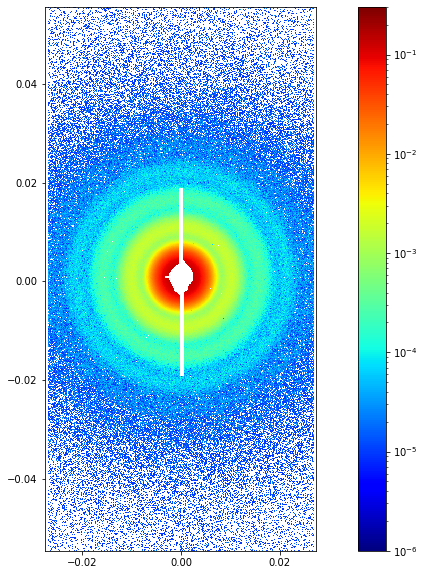

In [4]:

pix2q = pix_dim/det_dist*(2*3.1416/(12.4/X_energy))

Q_y_min = ((0-ccd_x0)*pix2q).item()
Q_y_max = ((Int_2D.shape[1]-ccd_x0)*pix2q).item()
Q_x_min = (0-ccd_y0)*pix2q.item()
Q_x_max = (Int_2D.shape[0]-ccd_y0)*pix2q.item()

QZ_colormap = plt.cm.jet
QZ_colormap.set_under(color='w')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
im = ax.imshow(Int_2D, cmap=QZ_colormap, norm=LogNorm(vmin=1e-6, vmax=3e-1),
               interpolation='none', extent=([Q_y_min, Q_y_max, Q_x_min, Q_x_max]))
fig.colorbar(im, ax=ax)
plt.rc('font', size=20)
# plt.savefig('Int_2D.pdf', dpi=100, format='pdf', facecolor='w', edgecolor='w', transparent=False)


# Plot $g_2$ #

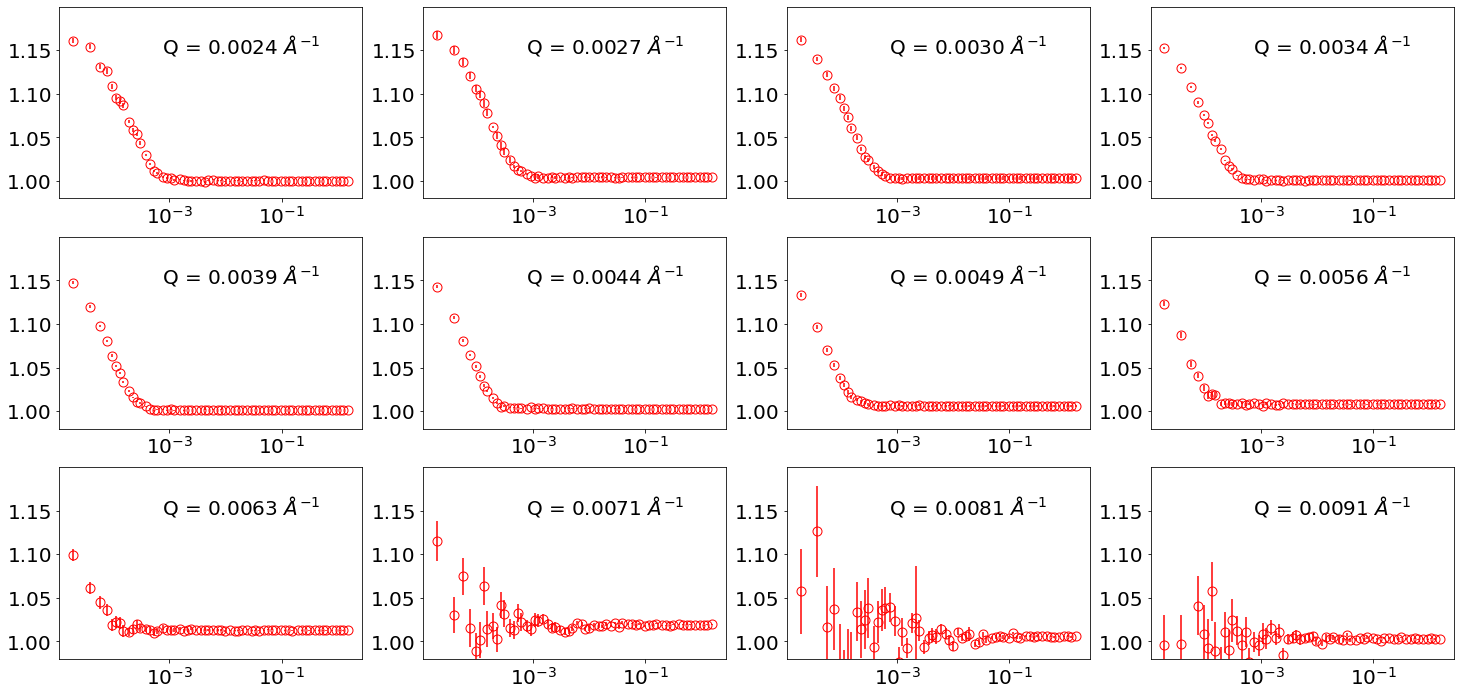

In [5]:

num_rows = 3
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 12))
plt.setp(axs, xticks=[1e-5,1e-3,1e-1], yticks=[1,1.05,1.1,1.15])
for ii in range(num_rows):
    for jj in range(num_cols):
        dim = ii*num_cols+jj  
        ax = axs[ii,jj]
        ax.set_xscale('log')
        ax.set_ylim(0.98, 1.2)
        ax.errorbar(t_el, g2[:,dim], yerr=g2_err[:,dim], 
            fmt='ro', markersize=9, markerfacecolor='none')
        ax.text(0.6, 0.8, ('Q = %5.4f $\AA^{-1}$' %ql_dyn[dim]), horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)

# plt.savefig('g2_ave.pdf', dpi=100, format='pdf', facecolor='w', edgecolor='w', transparent=True)
